# Healthcare Cost and Utilisation Analysis in R 
- (R for Jupyter Notebook)

#### Background and Objective:

- A nationwide survey of hospital costs conducted by the US Agency for Healthcare consists of hospital records of inpatient samples. The given data is restricted to the city of Wisconsin and relates to patients in the age group 0-17 years. The agency wants to analyze the data to research on healthcare costs and their utilization.

#### Dataset Description:
1. Age -->Age of the patient discharged
1. Female --> A binary variable that indicates if the patient is female
1. Los --> Length of stay in days
1. Race --> Race of the patient (specified numerically)
1. Totchg --> Hospital discharge costs
1. Aprdrg --> All Patient Refined Diagnosis Related Groups

#### Analysis to be done: 

1. To record the patient statistics, the agency wants to find the age category of people who frequent the hospital and has the maximum expenditure.
2. In order of severity of the diagnosis and treatments and to find out the expensive treatments, the agency wants to find the diagnosis-related group that has maximum hospitalization and expenditure.
3. To make sure that there is no malpractice, the agency needs to analyze if the race of the patient is related to the hospitalization costs.
4. To properly utilize the costs, the agency has to analyze the severity of the hospital costs by age and gender for the proper allocation of resources.
5. Since the length of stay is the crucial factor for inpatients, the agency wants to find if the length of stay can be predicted from age, gender, and race.
6. To perform a complete analysis, the agency wants to find the variable that mainly affects hospital costs.

----

# SOLUTION

In [23]:
# IMPORTING DATA
library("readxl")  
df = read_excel("1555054100_hospitalcosts - Copy.xlsx", col_names = TRUE)

In [2]:
# IMPORTING DATA
library("readxl")  
    # library to read excel file
df = read_excel(file.choose())
    # Dynamic selection for file location

---
## Basic EDA

In [19]:
#library(dplyr) # for glimpse function
glimpse(df)

Observations: 500
Variables: 6
$ AGE    <dbl> 17, 17, 17, 17, 17, 17, 17, 16, 16, 17, 17, 15, 15, 15, 15, ...
$ FEMALE <dbl> 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ LOS    <dbl> 2, 2, 7, 1, 1, 0, 4, 2, 1, 2, 2, 2, 2, 4, 7, 4, 1, 4, 3, 3, ...
$ RACE   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ TOTCHG <dbl> 2660, 1689, 20060, 736, 1194, 3305, 2205, 1167, 532, 1363, 1...
$ APRDRG <dbl> 560, 753, 930, 758, 754, 347, 754, 754, 753, 758, 758, 753, ...


In [ ]:
            # as.data.frame( sapply(df,typeof) )   # to onlt find datatypes 

In [ ]:
install.packages("DataExplorer", repos="https://cran.r-project.org", dependencies = TRUE)

In [11]:
head(df,3)
    # Viewing dataset

AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
17,1,2,1,2660,560
17,0,2,1,1689,753
17,1,7,1,20060,930


#### _ _ _  _  *_Result_* _ _ _ _

    1. Number of observations (rows) : 500 ---> nrow(df)
    2. Number of variables (columns) : 6 ---> ncol(df)
    3. Variable names : AGE | FEMALE | LOS | RACE | TOTCHG | APRDRG 
    4. Datatypes: Double 

In [21]:
is.factor(df$AGE)
is.factor(df$FEMALE)
is.factor(df$RACE)

[1] FALSE

[1] FALSE

[1] FALSE

In [13]:
# install.packages("DataExplorer", repos="https://cran.r-project.org", dependencies = FALSE)

# library(DataExplorer)
# plot_str(df)

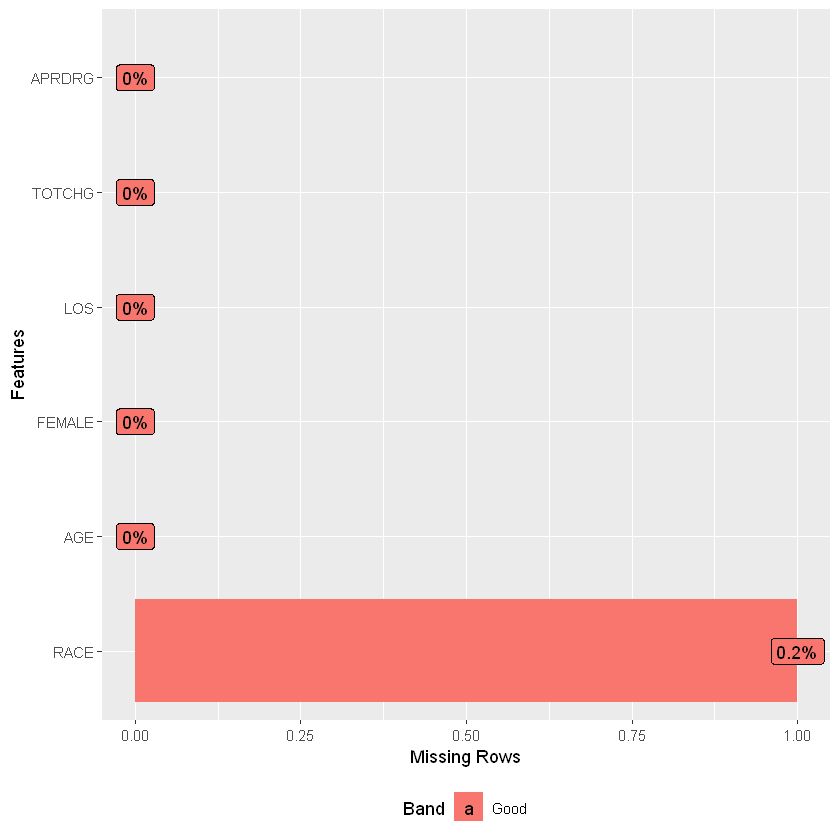

In [38]:
library(DataExplorer)
plot_missing(df)

In [4]:
# Checking for missing values
as.data.frame( colSums(is.na(df)) )

,colSums(is.na(df))
AGE,0
FEMALE,0
LOS,0
RACE,1
TOTCHG,0
APRDRG,0


In [41]:
# length(df$AGE)   # length of age col

[1] 500

#### _ _ _  _  *_Result_* _ _ _ _

    1. Only 1 value is missing in the RACE columns, which has 500 values
    2. As per the plot_missing graph, this only constitues 0.02% of the missing data

#### _FINDINGS - Basic EDA 
==================
- _All the columns are of numeric (double) data type_
- _There are 6 observations and around 500 observations per feature_    
- _There is only 1 missing value in the entire dataset, from a column with 500 values (0.02%), so this can be omitted when working with the column with a missing value_

-----------
## Q1. *AGE CATEGORY* - HIGHEST FREQ, MAX EXPENDITURE
----
- Problem statement : 
    1. "  To record the patient statistics, the agency wants to find the age category of people who frequent the hospital and has the maximum expenditure . " 

In [6]:
df$AGE_cat = cut(df$AGE,seq(0,18,6), right=FALSE, labels = c("0-6","7-12","13-18"))  # 3 age cateogry split

In [7]:
FREQ = table(df$AGE_cat)   # Calc frequency of visit by age category

In [8]:
DF1 = aggregate(TOTCHG~ AGE_cat, data=df, sum)
    # calculate total charge, for age categories
DF1$freq = FREQ

Don't know how to automatically pick scale for object of type table. Defaulting to continuous.


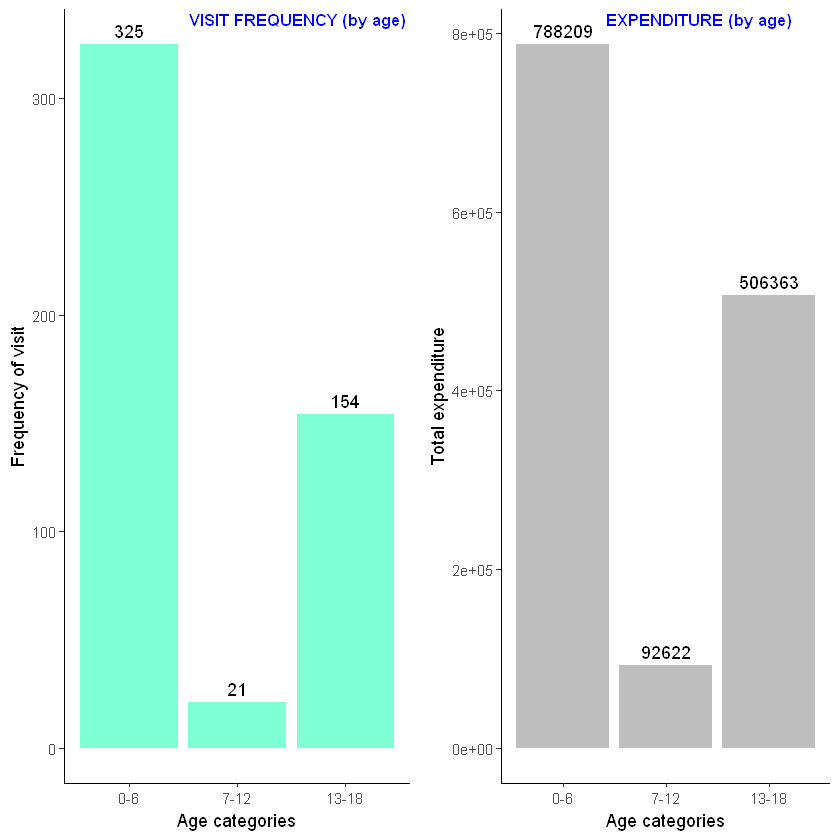

In [10]:
library(ggplot2)

P1 = ggplot(data=DF1, aes(x=AGE_cat, y=FREQ)) + geom_bar(stat="identity", fill="aquamarine") + geom_text(label = FREQ, vjust = -0.5) + theme_classic() + labs(y="Frequency of visit", x="Age categories")
    # AGE CATEGORY vs. FREQUENCY plot

P2 = ggplot(data=DF1, aes(x=AGE_cat, y=TOTCHG)) + geom_bar(stat="identity", fill="grey") + geom_text(label = DF1$TOTCHG , vjust = -0.5) + theme_classic() + labs(y="Total expenditure", x="Age categories")
    # AGE CATEGORY vs. EXPENTIURE plot
    # passing TOTCHG and not df$TOTCHG, to avoid error
    # geom_text -> to pass labels, vjust - adjust labels spacing from bar

library(cowplot)   # To plot ggplot2 plots adjavent to each other
plot_grid(P1,P2 , labels = c("VISIT FREQUENCY (by age)","EXPENDITURE (by age)"), hjust = -0.1 , vjust=2, label_size = 10, label_x = 0.4, label_colour = "BLUE")

#### _FINDINGS --> Q1. Highest Frequency and Total expenditure based on Age group_
==============================================================

_1. Age group of 0-6 (Children and Infants) are most frequent to the hospital_

_2. Age group 0-6 also have the highest expenditure of the three groups_     

_3. Since the same group are highest for expenditure and frequency of visit, we can say that the number of hospital visits are proportional to hospital costs._

---
## Q2. EXPENSIVE treatment, based on DIAGNOSIS GROUP
---
- Problem statement : 
    1. " In order of severity of the diagnosis and treatments and to find out the expensive treatments, the agency wants to find the diagnosis related group that has maximum hospitalization and expenditure. " 

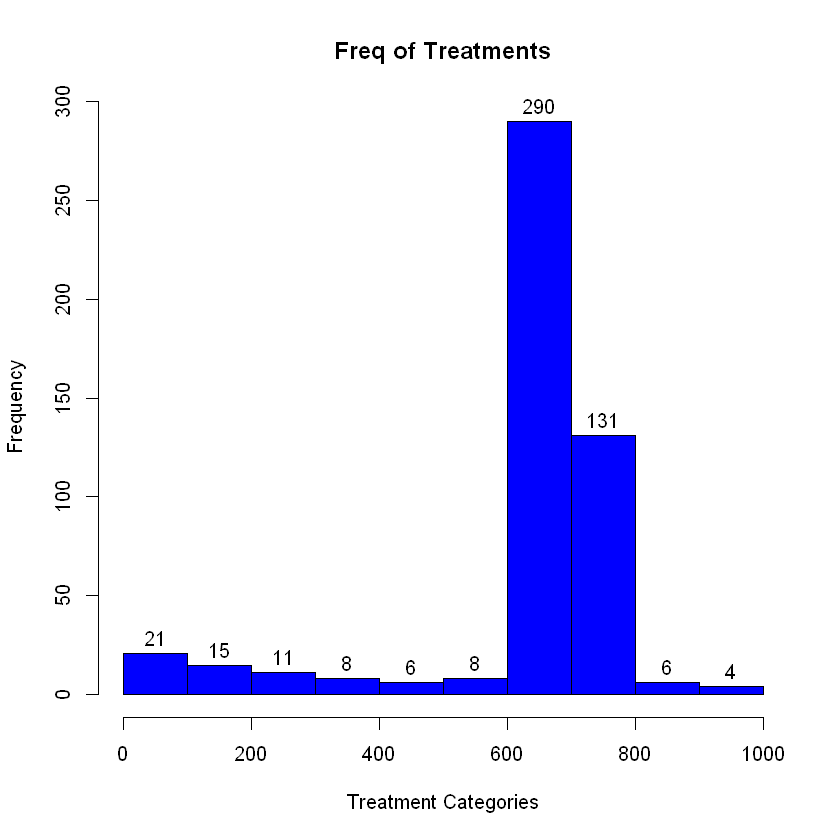

In [11]:
hist(df$APRDRG , col = "blue", main = "Freq of Treatments",xlab = "Treatment Categories", labels = TRUE) 

In [12]:
# This shows a HIGH FREQUENCY for DIAGNOSIS GROUPS with ids between 600 and 700

In [15]:
table(df$APRDRG)  # frequency by diagnosis group


 21  23  49  50  51  53  54  57  58  92  97 114 115 137 138 139 141 143 204 206 
  1   1   1   1   1  10   1   2   1   1   1   1   2   1   4   5   1   1   1   1 
225 249 254 308 313 317 344 347 420 421 422 560 561 566 580 581 602 614 626 633 
  2   6   1   1   1   1   2   3   2   1   3   2   1   1   1   3   1   3   6   4 
634 636 639 640 710 720 723 740 750 751 753 754 755 756 758 760 776 811 812 863 
  2   3   4 267   1   1   2   1   1  14  36  37  13   2  20   2   1   2   3   1 
911 930 952 
  1   2   1 

In [16]:
# TOTAL CHARGE BY DIAGNOSIS GROUP
GRP_CHG<-aggregate(TOTCHG~APRDRG,FUN = sum,data=df)  
head(GRP_CHG)

APRDRG,TOTCHG
21,10002
23,14174
49,20195
50,3908
51,3023
53,82271


In [17]:
GRP_CHG[which.max(GRP_CHG$TOTCHG),]
    # Diagnosis group highest total charge

,APRDRG,TOTCHG
44,640,437978


#### _FINDINGS --> Q2. MOST EXPENSIVE treatment, based on DIAGNOSIS GROUP ?_
==========================================================

_1. Diagnosis related groups (APRDRG) of group id '640' have the highest expenditure (frequency of 44)_

-----
## Q3.   DOES RACE AFFECT HOSPITALISATION COSTS ?
---
- Problem statement : 
    1. " To make sure that there is no malpractice, the agency needs to analyze if the race of the patient is related to the hospitalization costs " 
- Solution : Boxplot and ANOVA :
    1. A BOXPLOT  will show the Distribution of the Races, to show comparison
    1. ANOVA compares MEANS between groups of interest, and determines whether means are STATISTICALLY DIFFERENT. It only CHECKS STATISTIC SIGNIFICANCE (as compared to Linear regression which helps PREDICT Y VAL)
    2. Y var (RACE) is CATEGORICAL, hence ANOVA is chosen

#### a) BOXPLOT showing cost distribution by RACE 

In [18]:
# Omitting missing data row - since only 1 value is missing
df<-na.omit(df)

In [19]:
# length(unique(df$AGE))   # CHECKING NO OF LEVELS IF NUMERICAL
# levels(df$RACE) # checkin the lEVELS in RACE variable

In [20]:
df$RACE<-as.factor(df$RACE)   # converting to factor, to view diff races

In [21]:
table(df$RACE)  # view count of different races


  1   2   3   4   5   6 
484   6   1   3   3   2 

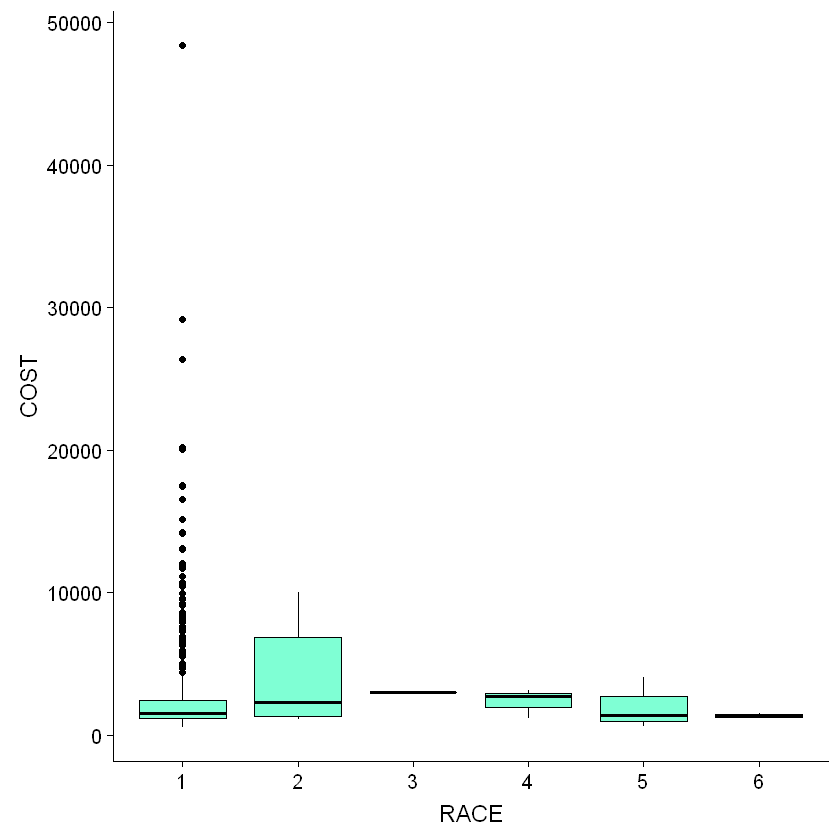

In [23]:
library(ggplot2)

ggplot(df, aes(x=RACE, y=TOTCHG)) + geom_boxplot(fill="aquamarine", color="black") + scale_x_discrete() + xlab("RACE") + ylab("COST")

# P1 = ggplot(data=DF1, aes(x=AGE_cat, y=FREQ)) + geom_bar(stat="identity", fill="aquamarine") + geom_text(label = FREQ, vjust = -0.5) + theme_classic() + labs(y="Frequency of visit", x="Age categories")
    # AGE CATEGORY vs. FREQUENCY plot

#### B) LINEAR MODEL showing affect of DIFFERENT RACE on variable TOTAL CHARGE 

In [24]:
MODEL <- lm(TOTCHG~RACE,data=df)
summary(MODEL)


Call:
lm(formula = TOTCHG ~ RACE, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -3049  -1551  -1223   -238  45615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2772.7      177.6  15.615   <2e-16 ***
RACE2         1429.5     1604.7   0.891    0.373    
RACE3          268.3     3910.5   0.069    0.945    
RACE4         -428.0     2262.4  -0.189    0.850    
RACE5         -746.0     2262.4  -0.330    0.742    
RACE6        -1423.7     2768.0  -0.514    0.607    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3906 on 493 degrees of freedom
Multiple R-squared:  0.002465,	Adjusted R-squared:  -0.007652 
F-statistic: 0.2437 on 5 and 493 DF,  p-value: 0.9429


-
#### _LINEAR MODEL findings_ 
===================
- _HIGH- RESIDUAL STANDARD ERROR and P VALUE indicates there is NO RELATION between RACE and CHARGES_

In [25]:
anova(MODEL)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
RACE,5,18593279,3718656,0.2436755,0.9428886
Residuals,493,7523518505,15260687,NA,NA


In [26]:
confint(MODEL)

,2.5 %,97.5 %
(Intercept),2423.786,3121.553
RACE2,-1723.346,4582.340
RACE3,-7415.023,7951.684
RACE4,-4873.126,4017.120
RACE5,-5191.126,3699.120
RACE6,-6862.219,4014.880


-
#### _ANOVA, CONFIDENCE INTERVAL findings_ 
=================================
- _These model summaries show the difference between the Races_
- _The function confint is used to calculate confidence intervals on the treatment parameters, by default 95% confidence intervals_

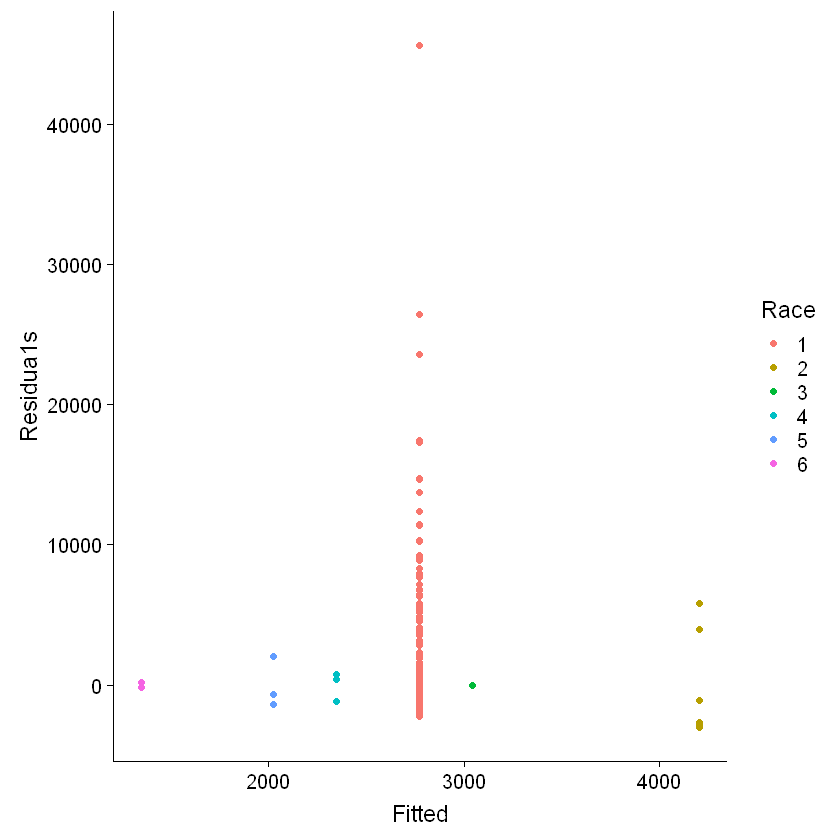

In [27]:
library(ggplot2)
mod = data.frame(Fitted = fitted(MODEL), Residua1s = resid(MODEL), Race = df$RACE)

ggplot(mod, aes(Fitted, Residua1s, colour = Race)) + geom_point()

#### _FINDINGS --> Q3. Does Race affect Hospitalisation costs ?_
======================================================
1. _From this graph we see can residuals are spread and with this evidence and confidence levels we can say that there is NO MALPRACTISE and RACE of the patient is NOT RELATED TO HOPSITALISATION COST_

---
## Q4. *HOSPITAL COST* SEVERITY, BY *AGE* AND *GENDER*
---
- Problem statement : 
    1. " To properly utilize the costs, the agency has to analyze the severity of the hospital costs by age and gender for proper allocation of resources. " 
- Solution : Linear model:
    1. Linear regression helps PREDICT THE VALUE of outcome variable Y (TOTCHG - Hospitalisation cost), based on one or more input predictor variables X ( AGE and GENDER)
    2. Y var (TOTCHG) is NUMERICAL, hence Linear regression is chosen over Anova

In [28]:
LM1 = lm(TOTCHG ~ AGE+FEMALE,data=df)
summary(LM1)


Call:
lm(formula = TOTCHG ~ AGE + FEMALE, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -3403  -1444   -873   -156  44950 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2719.45     261.42  10.403  < 2e-16 ***
AGE            86.04      25.53   3.371 0.000808 ***
FEMALE       -744.21     354.67  -2.098 0.036382 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3849 on 496 degrees of freedom
Multiple R-squared:  0.02585,	Adjusted R-squared:  0.02192 
F-statistic: 6.581 on 2 and 496 DF,  p-value: 0.001511


#### _FINDINGS --> Q4. Hospital cost severity, by Age and Gender ?__
===================================================

_1. AGE is highly statistically SIGNIFICANT for analysis (as shown by HIGH SIGNIFICANCE CODE and LOW P VALUE)_

_2. AGE - INCREASES TOTAL COST with a positive coefficient_

_3. GENDER is also statistically SIGNIFICANT for analysis_  _GENDER - DECREASES TOTAL COST - with a negative coefficient for Female1 gender . This means that  hospitalisation costs reduces in case of female and in case of males is quite high_
 </div>

---
## Q5. EFFECT OF AGE, GENDER, RACE ON LENGTH OF STAY
----

- Problem statement : 
    1. " Since the length of stay is the crucial factor for inpatients, the agency wants to find if the length of stay can be predicted from age, gender, and race. "
- Solution : Linear model:
    1. Linear regression helps PREDICT THE VALUE of a outcome variable Y (LOS - Length of stay), based on one or more input predictor variables X ( AGE, GENDER, RACE)
    2. Y var (LOS) is NUMERICAL, hence Linear regression is chosen over Anova

In [29]:
LM2 <- lm(LOS ~ AGE+FEMALE+RACE,data=df)
summary(LM2)


Call:
lm(formula = LOS ~ AGE + FEMALE + RACE, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-3.211 -1.211 -0.857  0.143 37.789 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.85687    0.23160  12.335   <2e-16 ***
AGE         -0.03938    0.02258  -1.744   0.0818 .  
FEMALE       0.35391    0.31292   1.131   0.2586    
RACE2       -0.37501    1.39568  -0.269   0.7883    
RACE3        0.78922    3.38581   0.233   0.8158    
RACE4        0.59493    1.95716   0.304   0.7613    
RACE5       -0.85687    1.96273  -0.437   0.6626    
RACE6       -0.71879    2.39295  -0.300   0.7640    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.376 on 491 degrees of freedom
Multiple R-squared:  0.008699,	Adjusted R-squared:  -0.005433 
F-statistic: 0.6156 on 7 and 491 DF,  p-value: 0.7432


#### _FINDINGS --> Q5. Effect of age, gender, race on LOS_
=====================================================================    
    
_1. GENDER (Female), RACE is NOT STATSTICALLY SIGNIFICANT, with a significance code of ~1_
    
_2. AGE has LOW STATISTICAL SIGNIFICANCE, with a significance code of 0.1_    - 
   
_3. The p value of AGE is 0.084 --> meaning that alpha = 8.4%_     

_4. Alpha is greater than 5% deafult, so NULL HYPOTHESIS will be accepted_

_5. Hence, we should AVOID age in analysis._ 

_6. So we can say that AGE, GENDER and RACE will not affect analysis, and CANNOT PREDICT LOS_
 </div>

---
## Q6. VARIABLE THAT MAINLY AFFECTS HOSPITAL COSTS
---

- Problem statement : 
    1. " To perform a complete analysis, the agency wants to find the variable that mainly affects the hospital costs "
- Solution : Linear model:
    1. Linear regression helps PREDICT THE VALUE  of an outcome variable Y (Hospitalisation charge - TOTCHG), based on one or more input predictor variables X ( AGE, GENDER, RACE, LOS - Length of stay, APRDRG- Diagnosis group )
    2. Y var (TOTCHG) is NUMERICAL, hence Linear regression is chosen over Anova

In [30]:
df$RACE<-as.factor(df$RACE) 

LM3 <- lm(TOTCHG ~ .,data=df)  #Using a Linear model
summary(LM3)


Call:
lm(formula = TOTCHG ~ ., data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -6619   -598   -142    122  42948 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4871.8762   466.2348  10.449  < 2e-16 ***
AGE            363.8554   108.3104   3.359 0.000842 ***
FEMALE        -382.2773   250.7722  -1.524 0.128058    
LOS            743.5966    35.0076  21.241  < 2e-16 ***
RACE2          399.1694  1092.1370   0.365 0.714901    
RACE3          318.9608  2622.4068   0.122 0.903243    
RACE4         -244.8185  1521.4327  -0.161 0.872229    
RACE5        -1716.5049  1530.0199  -1.122 0.262465    
RACE6         -691.5735  1854.7700  -0.373 0.709413    
APRDRG          -7.5750     0.7176 -10.556  < 2e-16 ***
AGE_cat7-12  -2072.7362  1149.8207  -1.803 0.072060 .  
AGE_cat13-18 -3539.5839  1639.0111  -2.160 0.031292 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2614 on 487 degrees of freedom
Multip

#### _FINDINGS --> Q6. Most significant variable_
===================================

_1. RACE and GENDER ("Female" column) don't have high impact on the costs. This is shown by LOW SIGNIFICANCE CODES_

_2. AGE, LOS (Length of stay) AND APRDRG (Diagnosis related groups) are SIGNIFICANT, as shown by a very low P value_ 

- _day of hospitilisation increase cost by 743_

- _Diagnosis related Groups (APRDRG) also affect costs_ 

- _Eg: Group 640 has a very high expenditure_

# <div style="background-color:rgba(204,255,51,0.2); text-align:center; vertical-align: middle; padding:20px;">  ===   END   === </div>